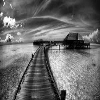

In [76]:
from PIL import Image
import numpy as np
import cv2

img = Image.open("./images/1.png")
r, g, b, a = img.split()
display(g)

In [49]:
img.size

(100, 100)

In [50]:
img_array = np.array(img)
l, w, h = img_array.shape

## Compress Class

In [51]:
class SVDImageCompressor:
    
    def __init__(self, img_path, compressed_path, out_path):
        self.img_path = img_path
        self.compressed_path = compressed_path
        self.out_path = out_path
    
    def findK(self, percentClarity, arr):
        k = 0
        s = 0
        arrSum = sum(arr)
        for i in arr:
            s += i
            p = (s/arrSum)*100
            k+=1
            if round(p) >= percentClarity:
                return k

    def compress_channel(self, img_array, channel, percentage):
        specific_channel = img_array[:,:,channel]
        U, S, Vt = np.linalg.svd(specific_channel)
        k = self.findK(percentage, S)
        reconstructed_channel = U[:,:k] @ np.diag(S[:k]) @ Vt[:k,:]
        return reconstructed_channel

    def store_compressed_data(self, percentage):
        img = Image.open(self.img_path)
        img_array = np.array(img)
        l, w, h = img_array.shape
        newimg_array = np.zeros((l,w,h))
        for channel in range(h):
            newimg_array[:,:,channel] = compress_channel(img_array, channel, percentage)
        np.save(self.compressed_path, newimg_array)
        return newimg_array

    def reconstruct_compressed_image(self):
        compressed_image = np.load(self.compressed_path)
        img = Image.fromarray(compressed_image.astype('uint8'))
        img.save(self.out_path)
        return img

In [52]:
img_comp = SVDImageCompressor("./images/1.png", "./compressed_images/1.npy", "./compressed_images/1.png")
img_comp.store_compressed_data()
img_comp.reconstruct_compressed_image()

TypeError: SVDImageCompressor.store_compressed_data() missing 1 required positional argument: 'percentage'

## Simple Compress

In [90]:
def findK(percentClarity, arr):
    k = 0
    s = 0
    arrSum = sum(arr)
    for i in arr:
        s += i
        p = (s/arrSum)*100
        k+=1
        if round(p) >= percentClarity:
            return k

def compress_channel(img_array, channel, percentage):
    specific_channel = img_array[:,:,channel]
    U, S, Vt = np.linalg.svd(specific_channel)
    print(U.shape, S.shape, Vt.shape)
    k = findK(percentage, S)
    reconstructed_channel = U[:,:k] @ np.diag(S[:k]) @ Vt[:k,:]
    return reconstructed_channel

def compressed_image(img_array, percentage):
    l, w, h = img_array.shape
    newimg_array = np.zeros((l,w,h))
    for channel in range(h):
        newimg_array[:,:,channel] = compress_channel(img_array, channel, percentage)
    # i = Image.fromarray(newimg_array.astype('uint8'))
    newimg_array[:, :, [0, 2]] = newimg_array[:, :, [2, 0]]
    return newimg_array/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(100, 100) (100,) (100, 100)
(100, 100) (100,) (100, 100)
(100, 100) (100,) (100, 100)


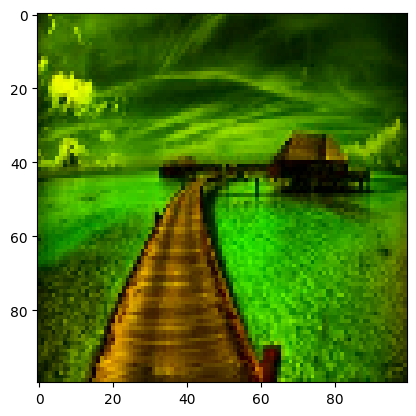

In [91]:
import matplotlib.pyplot as plt
# img = Image.open("./images/1.png")
img_array = cv2.imread("./images/1.png")
i = compressed_image(img_array, 100)
i[:, :, 2] = 0
plt.imshow(i)